#TODO
*cross check the implementation by some one expert

#heling material
https://github.com/ivashnyov/ODIR/issues/1  
https://github.com/nnnnew/ODIR  
https://github.com/DecentMakeover/odir_winningsubmission

# read data from directory

In [1]:
#connect drive with colab notebook
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#show content in working directory
ls

drive/  sample_data/


In [0]:
#cd drive/My\ Drive/ghina/thesis

#extract data

In [0]:
import pandas as pd

In [5]:
#following are libraries to unpack 7z file
!pip install patool 
!pip install pyunpack
from pyunpack import Archive

     |████████████████████████████████| 81kB 3.9MB/s 
  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5162 sha256=a86cee047ed2f9e68c2f1c124b2c83f89d7bbba85973a0cd43294bf3d757d441
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


In [0]:
#create a folder name as data
!mkdir data

In [0]:
#path where our data is saved
path='/content/drive/My Drive/ghina/thesis/'

In [0]:
#extract the 7z file in data folder we created above
#this not only extract the data but move it from drive to colab for efficinet processing
#it will take some time
Archive(path+'ODIR-5K_Training_Images.7z').extractall('data')

In [0]:
#read the annottion file
annotation=pd.read_excel(path+'ODIR-5K_Training_Annotations(Updated)_V2.xlsx')

In [0]:
#normal (N), diabetes (D), glaucoma (G), cataract (C), AMD (A), hypertension (H), myopia (M) and other diseases/abnormalities (O) 

In [11]:
#print first 5 rows of annotation file
annotation.head(10)

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  ...  C  A  H  M  O
0   0           69      Female  0_left.jpg  0_right.jpg  ...  1  0  0  0  0
1   1           57        Male  1_left.jpg  1_right.jpg  ...  0  0  0  0  0
2   2           42        Male  2_left.jpg  2_right.jpg  ...  0  0  0  0  1
3   3           66        Male  3_left.jpg  3_right.jpg  ...  0  0  0  0  1
4   4           53        Male  4_left.jpg  4_right.jpg  ...  0  0  0  0  1
5   5           50      Female  5_left.jpg  5_right.jpg  ...  0  0  0  0  0
6   6           60        Male  6_left.jpg  6_right.jpg  ...  0  0  0  0  1
7   7           60      Female  7_left.jpg  7_right.jpg  ...  0  0  0  0  1
8   8           59        Male  8_left.jpg  8_right.jpg  ...  0  0  0  0  0
9   9           54        Male  9_left.jpg  9_right.jpg  ...  0  0  0  0  1

[10 rows x 15 columns]

In [12]:
annotation['Left-Diagnostic Keywords'].value_counts().head(30)

normal fundus                                                      1433
moderate non proliferative retinopathy                              366
mild nonproliferative retinopathy                                   220
cataract                                                            135
pathological myopia                                                 111
lens dust，normal fundus                                             110
glaucoma                                                            104
dry age-related macular degeneration                                 93
severe nonproliferative retinopathy                                  70
drusen                                                               66
epiretinal membrane                                                  54
hypertensive retinopathy                                             53
macular epiretinal membrane                                          49
normal fundus，lens dust                                         

In [13]:
annotation['Right-Diagnostic Keywords'].value_counts().head(30)

normal fundus                                                      1383
moderate non proliferative retinopathy                              379
mild nonproliferative retinopathy                                   240
cataract                                                            127
pathological myopia                                                 116
lens dust，normal fundus                                             112
dry age-related macular degeneration                                103
glaucoma                                                             96
severe nonproliferative retinopathy                                  74
drusen                                                               72
macular epiretinal membrane                                          71
epiretinal membrane                                                  55
hypertensive retinopathy                                             51
myelinated nerve fibers                                         

#read single image

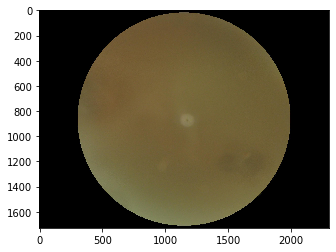

In [14]:
#read a single image from data and display it
import cv2 #for reading images
import matplotlib.pyplot as plt # for displaying images

image=cv2.imread('data/ODIR-5K_Training_Dataset/0_left.jpg')
#cv2 read image in BGR format, and plt displaying image in RGB format. SO we need to convert BGR2RGB
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
plt.imshow(image) #display image


In [15]:
#now read all image in left fundus column
for img_file,disease in zip(annotation['Left-Fundus'],annotation['Left-Diagnostic Keywords'])	:
  print(img_file,disease)
  break

0_left.jpg cataract


#read all images

In [0]:
#create  list where we can store image , 
#this will take some time
left_images=[]
for img_file in (annotation['Left-Fundus'])	:
  image=cv2.imread('data/ODIR-5K_Training_Dataset/{}'.format(img_file))#read image
  image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #change BGR to RGB for sake of plotting
  image=cv2.resize(image,(224,224)) #resize image
  left_images.append(image)#append image in above create list of images
  

In [0]:
#create  list where we can store image , 
#this will take some time
right_images=[]
for img_file in (annotation['Right-Fundus'])	:
  image=cv2.imread('data/ODIR-5K_Training_Dataset/{}'.format(img_file))#read image
  image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #change BGR to RGB for sake of plotting
  image=cv2.resize(image,(224,224)) #resize image
  right_images.append(image)#append image in above create list of images
  

In [0]:
labels=annotation.iloc[:,-8::]

In [19]:
labels.head()

N  D  G  C  A  H  M  O
0  0  0  0  1  0  0  0  0
1  1  0  0  0  0  0  0  0
2  0  1  0  0  0  0  0  1
3  0  0  0  0  0  0  0  1
4  0  1  0  0  0  0  0  1

In [0]:
#conver the images list to array so we can feed it to neural net
import numpy as np
XL=np.array(left_images)
XR=np.array(right_images)
y=np.array(labels)

In [21]:
XL.shape,XR.shape,y.shape

((3500, 224, 224, 3), (3500, 224, 224, 3), (3500, 8))

In [0]:
# #save variables in drive, so next we can load them directly
# np.save(path+'X.npy',X)
# np.save(path+'y.npy',y)

In [0]:
#split data
from sklearn.model_selection import train_test_split
XL_train, XL_val, yL_train, yL_val = train_test_split(XL, y, test_size=0.33, random_state=42)
XR_train, XR_val, yR_train, yR_val = train_test_split(XR, y, test_size=0.33, random_state=42)

In [24]:
sum(XL_val==XR_val).any()

True

#Date generator

In [0]:
BATCH_SIZE=32

In [26]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               vertical_flip=False,
                               fill_mode='nearest'# Fill in missing pixels with the nearest filled value
                                )
val_datagen=ImageDataGenerator(rescale=1/255)

Using TensorFlow backend.


In [0]:
def multi_train_gen(gen,XR_train,XL_train,yR_train,yL_train):
  XR_generator = train_datagen.flow(XR_train, yR_train, batch_size=BATCH_SIZE)
  XL_generator = train_datagen.flow(XL_train, yL_train, batch_size=BATCH_SIZE)
  while True:
    X1i = XR_generator.next()
    X2i = XL_generator.next()
    yield [X1i[0], X2i[0]], X2i[1] 

In [0]:
input_gen=multi_train_gen(train_datagen,XR_train,XL_train,yR_train,yL_train)    

In [0]:
def multi_val_gen(gen,XR_val,XL_val,yR_val,yL_val):
  vR_generator = val_datagen.flow(XR_val, yR_val, batch_size=BATCH_SIZE)
  vL_generator = val_datagen.flow(XL_val, yL_val, batch_size=BATCH_SIZE)

  while True:
    X1i = vR_generator.next()
    X2i = vL_generator.next()
    yield [X1i[0], X2i[0]], X2i[1] 

In [0]:
val_gen=multi_val_gen(val_datagen,XR_val,XL_val,yR_val,yL_val)    

In [0]:
#steps_train = XR_generator.n//XR_generator.batch_size
#steps_valid = vR_generator.n//vR_generator.batch_size


In [0]:
steps_train=73

In [0]:
steps_valid=36


#RESNET 50

following idea is borrowed from following link. 
https://github.com/nnnnew/ODIR/blob/master/train/2_pretrained_model_and_1_classifier.ipynb  
Data Generator is combined with multiinput model .
Thanks to https://github.com/keras-team/keras/issues/8130#issuecomment-336855177  
default input size for resent is `224x224`  
https://keras.io/applications/#resnet

In [0]:
from keras.models import Sequential,Model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input
from keras.layers import GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [55]:
import keras
left_input=Input(shape=XL.shape[1::])
right_input=Input(shape=XR.shape[1::])

left_model = ResNet50(include_top=False,input_tensor=left_input)
for layer in left_model.layers:
        layer.name = layer.name + '_left'
        layer.trainable = True


right_model = ResNet50(include_top=False,input_tensor=right_input)
for layer in right_model.layers:
        layer.name = layer.name + '_right'
        layer.trainable = True


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:

x = keras.layers.concatenate([left_model.output, right_model.output])
x=  keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(512)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dense(512)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dropout(0.2)(x)
out = keras.layers.Dense(8, activation='sigmoid')(x)
model = keras.models.Model(inputs=[left_input, right_input], outputs=out)


In [0]:
from keras.optimizers import Adam,RMSprop
opt = RMSprop(lr=1e-3,decay=0.2)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:

history=model.fit_generator(generator=input_gen,
                        steps_per_epoch=steps_train,
                        validation_data=val_gen,
                        validation_steps=steps_valid,
                        epochs=10,
                        )

Epoch 1/10
73/73 [==============================] - 79s 1s/step - loss: 2.1250 - acc: 0.3104 - val_loss: 1.9188 - val_acc: 0.3602
Epoch 2/10
73/73 [==============================] - 50s 686ms/step - loss: 1.8985 - acc: 0.3873 - val_loss: 1.8093 - val_acc: 0.4069
Epoch 3/10
73/73 [==============================] - 52s 713ms/step - loss: 1.8130 - acc: 0.4342 - val_loss: 1.8041 - val_acc: 0.3900
Epoch 4/10
73/73 [==============================] - 52s 713ms/step - loss: 1.8004 - acc: 0.4410 - val_loss: 1.7542 - val_acc: 0.4248
Epoch 5/10
73/73 [==============================] - 52s 710ms/step - loss: 1.7619 - acc: 0.4406 - val_loss: 1.7806 - val_acc: 0.4194
Epoch 6/10
73/73 [==============================] - 52s 711ms/step - loss: 1.7250 - acc: 0.4613 - val_loss: 1.7611 - val_acc: 0.4256
Epoch 7/10
73/73 [==============================] - 52s 712ms/step - loss: 1.7031 - acc: 0.4744 - val_loss: 1.7318 - val_acc: 0.4408
Epoch 8/10
73/73 [==============================] - 52s 710ms/step - los

In [0]:
keras.backend.clear_session()